### House Prices - Advanced Regression Techniques

This project is for Kaggle data science competition.
The goal here is to predict the sales price for each house by building a model using training data. 
I am going to visualize data table to understand distribution, trend, any correlation, and abnormalities using matplotlib/seaborn. I will clean the data if necessary for more accurate prediction. Then I will build a model to test price of each house in test dataset. Models are evaluated based on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import piplite
await piplite.install('seaborn') ## this is only for jupyter online

In [3]:
import seaborn as sns

In [4]:
# housing_index = pd.read_csv('/Users/jihyeson/Desktop/data science projects/housing_prediction/train.csv')
housing_index = pd.read_csv('train.csv')


In [5]:
housing_index.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
housing_index.shape

(1460, 81)

In [8]:
housing_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
housing_index.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
housing_index =housing_index.set_index('Id')

In [11]:
housing_index.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [36]:
summary_sub = housing_index.groupby('MSSubClass')['SalePrice'].agg(['count',np.mean,min,max])
summary_sub.sort_values(['mean'])

,count,mean,min,max
MSSubClass,,,,
30,69,95829.724638,34900,163500
180,10,102300.000000,75500,148000
45,12,108591.666667,76000,139400
190,30,129613.333333,55000,228950
90,52,133541.076923,82000,206300
160,63,138647.380952,75000,239000
50,144,143302.972222,37900,410000
85,20,147810.000000,123000,198500
40,4,156125.000000,79500,260000


In [40]:
summary_sub['gab'] = summary_sub['max'] - summary_sub['min']
summary_sub.sort_values(['gab'])

,count,mean,min,max,gab
MSSubClass,,,,,
45,12,108591.666667,76000,139400,63400
180,10,102300.000000,75500,148000,72500
85,20,147810.000000,123000,198500,75500
90,52,133541.076923,82000,206300,124300
30,69,95829.724638,34900,163500,128600
160,63,138647.380952,75000,239000,164000
190,30,129613.333333,55000,228950,173950
40,4,156125.000000,79500,260000,180500
80,58,169736.551724,107000,345000,238000


In [13]:
summary_sub.index.values

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190], dtype=int64)

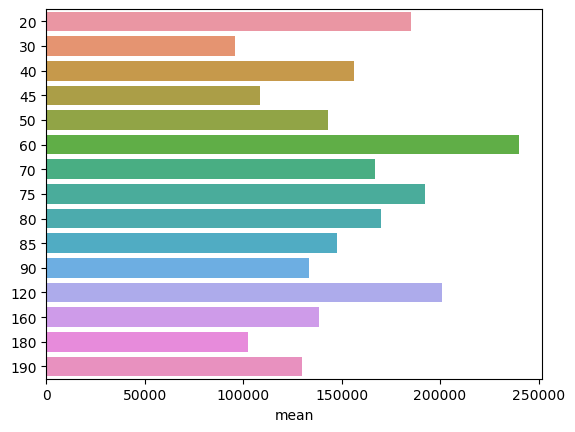

In [38]:
g = sns.barplot(x='mean',y=summary_sub.index.values.astype(str), data = summary_sub)
plt.show(g)

Top 3 average sale price based on type of dwelling:
- 60: 2-STORY 1946 & NEWER
- 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 75: 2-1/2 STORY ALL AGES



In [15]:
summary_zon = housing_index.groupby('MSZoning')['SalePrice'].agg(['count',np.mean,min,max])
summary_zon

,count,mean,min,max
MSZoning,,,,
C (all),10,74528.000000,34900,133900
FV,65,214014.061538,144152,370878
RH,16,131558.375000,76000,200000
RL,1151,191004.994787,39300,755000
RM,218,126316.830275,37900,475000


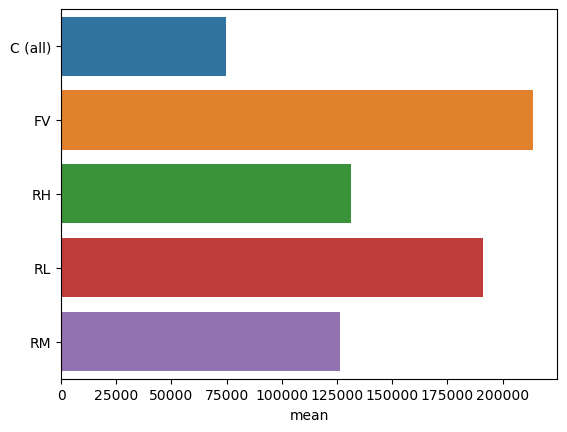

In [41]:
sns.barplot(x='mean',y=summary_zon.index.values.astype(str), data = summary_zon)
plt.show(g)

Top 3 average sales price based on zoning:
- FV :Floating Village Residential
- RL :Residential Low Density
- RH :Residential High Density

In [16]:
summary_st = housing_index.groupby('Street')['SalePrice'].agg(['count',np.mean,min,max])
summary_st

,count,mean,min,max
Street,,,,
Grvl,6,130190.500000,55993,228950
Pave,1454,181130.538514,34900,755000


Based on type of road access to property (Gravel vs Paved)
- mean sales price were higher for paved road
- higher % type of road was paved as well. 


In [17]:
summary_alley = housing_index.groupby('Alley')['SalePrice'].agg(['count',np.mean,min,max])
summary_alley

,count,mean,min,max
Alley,,,,
Grvl,50,122219.080000,52500,256000
Pave,41,168000.585366,40000,265979


Based on type of alley access to property (Gravel vs Paved)
- mean sales price were higher for paved road
- higher % type of alley access to property was gravel. 




In [18]:
summary_lshape = housing_index.groupby('LotShape')['SalePrice'].agg(['count',np.mean,min,max])
summary_lshape

,count,mean,min,max
LotShape,,,,
IR1,484,206101.665289,52000,755000
IR2,41,239833.365854,110000,538000
IR3,10,216036.500000,73000,375000
Reg,925,164754.818378,34900,582933


LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       


In [19]:
summary_landcontour = housing_index.groupby('LandContour')['SalePrice'].agg(['count',np.mean,min,max])
summary_landcontour

,count,mean,min,max
LandContour,,,,
Bnk,63,143104.079365,52500,315000
HLS,50,231533.940000,82500,538000
Low,36,203661.111111,39300,385000
Lvl,1311,180183.746758,34900,755000


LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to 

In [20]:
housing_index.groupby('Utilities')['SalePrice'].agg(['count',np.mean,min,max])

,count,mean,min,max
Utilities,,,,
AllPub,1459,180950.95682,34900,755000
NoSeWa,1,137500.00000,137500,137500


Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	


In [21]:
housing_index.groupby('LotConfig')['SalePrice'].agg(['count',np.mean,min,max])

,count,mean,min,max
LotConfig,,,,
Corner,263,181623.425856,52500,755000
CulDSac,94,223854.617021,84000,625000
FR2,47,177934.574468,81000,394617
FR3,4,208475.000000,128000,315000
Inside,1052,176938.047529,34900,611657


LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property


In [22]:
summary_lslope = housing_index.groupby('LandSlope')['SalePrice'].agg(['count',np.mean,min,max])
summary_lslope

,count,mean,min,max
LandSlope,,,,
Gtl,1382,179956.799566,34900,755000
Mod,65,196734.138462,39300,538000
Sev,13,204379.230769,61000,375000


In [23]:
summary_lslope.axes

[Index(['Gtl', 'Mod', 'Sev'], dtype='object', name='LandSlope'),
 Index(['count', 'mean', 'min', 'max'], dtype='object')]

In [24]:
summary_lslope.index.values

array(['Gtl', 'Mod', 'Sev'], dtype=object)

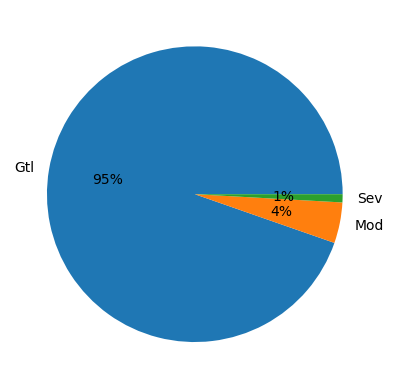

In [25]:
plt.pie(summary_lslope['count'],labels=summary_lslope.index.values, autopct='%.0f%%');

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope


In [26]:
summary_nb = housing_index.groupby('Neighborhood')['SalePrice'].agg(['count',np.mean,min,max])
summary_nb

,count,mean,min,max
Neighborhood,,,,
Blmngtn,17,194870.882353,159895,264561
Blueste,2,137500.000000,124000,151000
BrDale,16,104493.750000,83000,125000
BrkSide,58,124834.051724,39300,223500
ClearCr,28,212565.428571,130000,328000
CollgCr,150,197965.773333,110000,424870
Crawfor,51,210624.725490,90350,392500
Edwards,100,128219.700000,58500,320000
Gilbert,79,192854.506329,141000,377500


In [27]:
summary_nb.axes

[Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
        'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
       dtype='object', name='Neighborhood'),
 Index(['count', 'mean', 'min', 'max'], dtype='object')]

<AxesSubplot:xlabel='mean'>

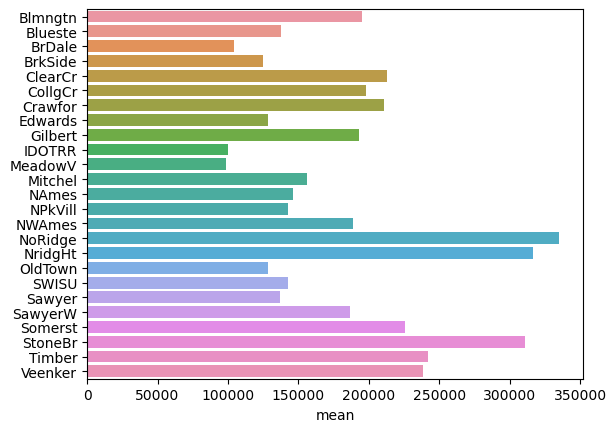

In [28]:
sns.barplot(x='mean',y=summary_nb.index.values, data = summary_nb)

In [29]:
summary_hs = housing_index.groupby('HouseStyle')['SalePrice'].agg(['count',np.mean,min,max])
summary_hs

,count,mean,min,max
HouseStyle,,,,
1.5Fin,154,143116.740260,37900,410000
1.5Unf,14,110150.000000,76000,139400
1Story,726,175985.477961,34900,611657
2.5Fin,8,220000.000000,104000,475000
2.5Unf,11,157354.545455,101000,325000
2Story,445,210051.764045,40000,755000
SFoyer,37,135074.486486,75500,206300
SLvl,65,166703.384615,91000,345000


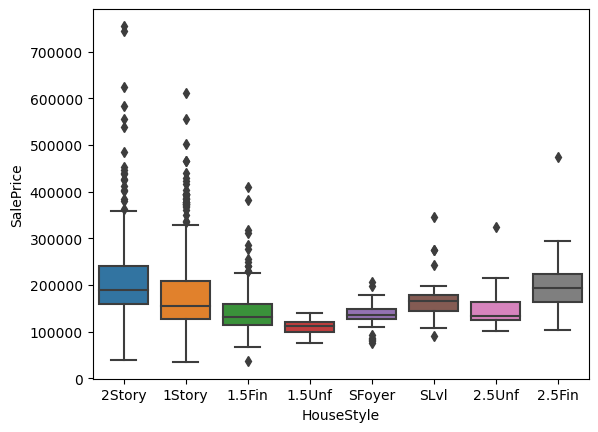

In [30]:
sns.boxplot(x='HouseStyle', y ='SalePrice',data = housing_index);

In [31]:
yearly_price = housing_index.groupby('YrSold')['SalePrice'].agg(np.mean)
yearly_price

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [32]:
yearly_price.axes

[Int64Index([2006, 2007, 2008, 2009, 2010], dtype='int64', name='YrSold')]

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

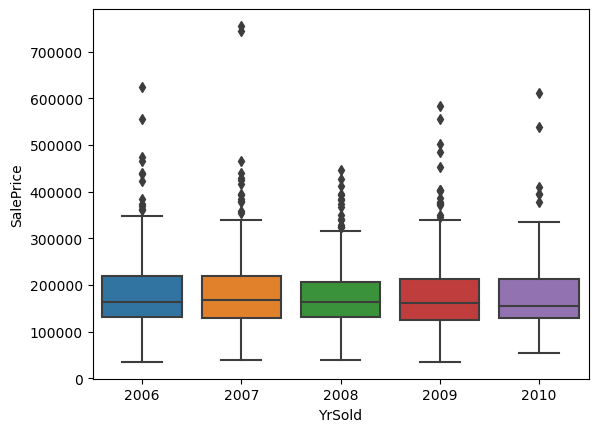

In [33]:
sns.boxplot(data=housing_index, x="YrSold", y="SalePrice")